# Declarações

In [1]:
!pip install basedosdados
import basedosdados as bd
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import scipy.stats as sp

# ENEM para IDEP

## Importando base de dados

In [ ]:
enem_2019 = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019.csv', sep = ',',
                        usecols = ['treineiro', 'nota_lc', 'nota_mt', 'nota_redacao', 'estado'],
                        skiprows = lambda i: i > 0 and random.random() > 0.1)

## Removendo treineiros

In [ ]:
enem_2019 = enem_2019.drop(enem_2019[enem_2019.treineiro == 1].index) #removendo os treineiros ;)
enem_2019.query('treineiro == 1')

In [ ]:
enem_2019.drop(columns = 'treineiro', inplace = True)
enem_2019.sample(10)

## Exportando a base de dados tratada

In [ ]:
enem_2019.dropna(inplace = True)
enem_2019.describe()
enem_2019.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019_idep.csv',
                           sep=';', index=False, encoding='utf-8-sig')

## Importando base de dados tratada

In [ ]:
enem_2019_idep = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019_idep.csv',
                           sep=';', encoding='utf-8-sig')

## Organizando por estado e deixando apropriado para comparar com a base do IDEP

In [ ]:
enem_2019_idep_uf = enem_2019_idep.groupby('estado')
enem_2019_idep_uf.mean()

In [ ]:
df_enem_2019_idep_uf = enem_2019_idep_uf.mean().reset_index()
df_enem_2019_idep_uf.rename(columns={'estado': 'sigla_uf'}, inplace=True)
df_enem_2019_idep_uf

# IDEP


## Importando a base do IDEB

In [ ]:
idep_uf = bd.read_table(dataset_id='br_inep_ideb', table_id='uf', billing_project_id="analytica-desigualdade")

## Tratando os dados

In [ ]:
idep_uf.drop(columns = "indicador_rendimento", inplace = True) #é a mesma coisa que a taxa de aprovação!

In [ ]:
idep_uf_2019 = idep_uf.query("ano == 2019").drop(columns = 'ano')
idep_2019_total = idep_uf_2019.query("rede == 'total'").drop(columns = 'rede')
idep_2019_fundamentalI = idep_2019_total.query("anos_escolares == 'finais (6-9)'").drop(columns = ['anos_escolares', 'ensino'])
idep_2019_fundamentalII = idep_2019_total.query("anos_escolares == 'iniciais (1-5)'").drop(columns = ['anos_escolares', 'ensino'])
idep_2019_medio = idep_2019_total.query("anos_escolares == 'todos (1-4)'").drop(columns = ['anos_escolares', 'ensino'])

## Exportando as base de dados tratadas

In [ ]:
idep_2019_fundamentalI.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\idep_fundamentalI_2019.csv',
                           sep=';', index=False, encoding='utf-8-sig')
idep_2019_fundamentalII.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\idep_fundamentalII_2019.csv',
                           sep=';', index=False, encoding='utf-8-sig')
idep_2019_medio.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\idep_medio_2019.csv',
                           sep=';', index=False, encoding='utf-8-sig')

## Importando as bases de dados tratadas

In [ ]:
idep_2019_fundamentalI = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\idep_fundamentalI_2019.csv',
                                     sep=';')
idep_2019_fundamentalII = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\idep_fundamentalII_2019.csv',
                           sep=';')
idep_2019_medio = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\idep_medio_2019.csv',
                           sep=';')

# Unindo os datasets

In [ ]:
idep_2019_fundamentalI_mat  = idep_2019_fundamentalI.loc[:, ['sigla_uf', 'nota_saeb_matematica']].reset_index().drop(columns = 'index')
idep_2019_fundamentalII_mat = idep_2019_fundamentalII.loc[:, ['sigla_uf', 'nota_saeb_matematica']].reset_index().drop(columns = 'index')
idep_2019_medio_mat         = idep_2019_medio.loc[:, ['sigla_uf', 'nota_saeb_matematica']].reset_index().drop(columns = 'index')
df_enem_2019_cat_renda_por_uf_mat = df_enem_2019_cat_renda_por_uf.loc[:, ['sigla_uf', 'nota_mt']]
matematica_2019 = pd.merge(idep_2019_fundamentalI_mat, idep_2019_fundamentalII_mat, on='sigla_uf')
matematica_2019 = pd.merge(matematica_2019, idep_2019_medio_mat, on='sigla_uf')
matematica_2019 = pd.merge(matematica_2019, df_enem_2019_cat_renda_por_uf_mat, on='sigla_uf')
matematica_2019.rename(columns = {'nota_saeb_matematica_x': 'nota_saeb_fundamentalI', 'nota_saeb_matematica_y': 'nota_saeb_fundamentalII',
                                 'nota_saeb_matematica': 'nota_saeb_medio', 'nota_mt': 'enem'}, inplace=True)
matematica_2019

In [ ]:
idep_2019_fundamentalI_por  = idep_2019_fundamentalI.loc[:, ['sigla_uf', 'nota_saeb_lingua_portuguesa']].reset_index().drop(columns = 'index')
idep_2019_fundamentalII_por = idep_2019_fundamentalII.loc[:, ['sigla_uf', 'nota_saeb_lingua_portuguesa']].reset_index().drop(columns = 'index')
idep_2019_medio_por         = idep_2019_medio.loc[:, ['sigla_uf', 'nota_saeb_lingua_portuguesa']].reset_index().drop(columns = 'index')
df_enem_2019_cat_renda_por_uf_port = df_enem_2019_cat_renda_por_uf.loc[:, ['sigla_uf', 'nota_lc']]
portugues_2019 = pd.merge(idep_2019_fundamentalI_por, idep_2019_fundamentalII_por, on='sigla_uf')
portugues_2019 = pd.merge(portugues_2019, idep_2019_medio_por, on='sigla_uf')
portugues_2019 = pd.merge(portugues_2019, df_enem_2019_cat_renda_por_uf_port, on='sigla_uf')
portugues_2019.rename(columns = {'nota_saeb_lingua_portuguesa_x': 'nota_saeb_fundamentalI', 'nota_saeb_lingua_portuguesa_y': 'nota_saeb_fundamentalII',
                                 'nota_saeb_lingua_portuguesa': 'nota_saeb_medio', 'nota_lc': 'enem'}, inplace=True)
portugues_2019

In [ ]:
idep_2019_fundamentalI_por  = idep_2019_fundamentalI.loc[:, ['sigla_uf', 'nota_saeb_lingua_portuguesa']].reset_index().drop(columns = 'index')
idep_2019_fundamentalII_por = idep_2019_fundamentalII.loc[:, ['sigla_uf', 'nota_saeb_lingua_portuguesa']].reset_index().drop(columns = 'index')
idep_2019_medio_por         = idep_2019_medio.loc[:, ['sigla_uf', 'nota_saeb_lingua_portuguesa']].reset_index().drop(columns = 'index')
df_enem_2019_cat_renda_por_uf_red = df_enem_2019_cat_renda_por_uf.loc[:, ['sigla_uf', 'nota_redacao']]
portugues_2019 = pd.merge(idep_2019_fundamentalI_por, idep_2019_fundamentalII_por, on='sigla_uf')
portugues_2019 = pd.merge(portugues_2019, idep_2019_medio_por, on='sigla_uf')
redacao_2019 = pd.merge(portugues_2019, df_enem_2019_cat_renda_por_uf_red, on='sigla_uf')
redacao_2019.rename(columns = {'nota_saeb_lingua_portuguesa_x': 'nota_saeb_fundamentalI', 'nota_saeb_lingua_portuguesa_y': 'nota_saeb_fundamentalII',
                                 'nota_saeb_lingua_portuguesa': 'nota_saeb_medio', 'nota_redacao': 'enem'}, inplace=True)
redacao_2019

## Exportando as bases de dados

In [ ]:
portugues_2019.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\portugues_2019.csv',
                           sep=';', index=False, encoding='utf-8-sig')
matematica_2019.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\matematica_2019.csv',
                           sep=';', index=False, encoding='utf-8-sig')
redacao_2019.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\redacao_2019.csv',
                           sep=';', index=False, encoding='utf-8-sig')

## Importando as bases de dados

In [ ]:
portugues_2019 = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\portugues_2019.csv',
                           sep=';')
matematica_2019 = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\matematica_2019.csv',
                           sep=';')
redacao_2019 = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\redacao_2019.csv',
                           sep=';')

## Explorando as bases de dados

In [ ]:
portugues_2019.corr() 
#base importa muito! mas quanto mais próximo, mais correlação esses dois exames têm em português, embora menos que matemática
#em todos os casos, a correlação é forte!

In [ ]:
plt.matshow(portugues_2019.corr())
plt.show()

In [ ]:
matematica_2019.corr() 
#base importa muito! mas quanto mais próximo, mais correlação esses dois exames têm em matemática. 
#em todos os casos a correlação é forte!

In [ ]:
plt.matshow(matematica_2019.corr())
plt.show()

In [ ]:
redacao_2019.corr() #redação não tem tanta correlação com estudar português - correlação moderada (!!!)

In [ ]:
plt.matshow(redacao_2019.corr())
plt.show()

### Conclusão: Estudo de base sólido tem uma correlação forte no desempenho do enem. Naturalmente, quão mais próximas temporamente elas forem, mais forte será o impacto. Vemos que isso especialmente se dá em matemática, que é uma matéria cheia de pré-requisitos, os quais sem eles, o aluno pode se perder conforme o tempo passa e não só se desinteressar na matéria, mas também não assimilar novos conhecimentos. Embora o português não tenha esse caráter, ainda é de forte correlação o quanto o estado dedica nos ensinos primários e seu desempenho no ENEM. Finalmente, o estudo de base em português tem uma correlação moderada com as notas de redação do ENEM; talvez isso se dê pelo fato da redação do ENEM ter como apenas uma competência a gramática, representando 1/5 da nota. De forma geral, o resumo é que aqueles estados que se dedicam nos ensinos de base são recompensados com boas notas no ENEM.

# Explorando a base de dados do IDEP

## Importando as base de dados tratadas

In [ ]:
idep_2019_fundamentalI = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\idep_fundamentalI_2019.csv',
                                     sep=';')
idep_2019_fundamentalII = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\idep_fundamentalII_2019.csv',
                           sep=';')
idep_2019_medio = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\idep_medio_2019.csv',
                           sep=';')

In [ ]:
idep_2019_fundamentalI.boxplot('taxa_aprovacao')

In [ ]:
idep_2019_fundamentalII.boxplot('taxa_aprovacao')

In [ ]:
idep_2019_medio.boxplot('taxa_aprovacao')

### Não há outliers!

In [ ]:
idep_2019_fundamentalI_sorted = idep_2019_fundamentalI.sort_values("taxa_aprovacao")

plt.rc('figure', figsize = (20, 10))

fig = plt.bar(idep_2019_fundamentalI_sorted['sigla_uf'], idep_2019_fundamentalI_sorted['taxa_aprovacao'])
plt.ylabel("Taxa de aprovação (%)", fontsize = 30)
plt.title("Taxa de aprovação do IDEP fundamental I por estado", fontsize = 40, pad = 20)

In [ ]:
idep_2019_fundamentalII_sorted = idep_2019_fundamentalII.sort_values("taxa_aprovacao")

plt.bar(idep_2019_fundamentalII_sorted['sigla_uf'], idep_2019_fundamentalII_sorted['taxa_aprovacao'])
plt.ylabel("Taxa de aprovação (%)", fontsize = 30)
plt.title("Taxa de aprovação do IDEP fundamental II por estado", fontsize = 40, pad = 20)

In [ ]:
idep_2019_medio_sorted = idep_2019_medio.sort_values("taxa_aprovacao")

fig = plt.gcf()

fig.set_size_inches(18.5, 10.5)
plt.bar(idep_2019_medio_sorted['sigla_uf'], idep_2019_medio_sorted['taxa_aprovacao'])
plt.ylabel("Taxa de aprovação (%)", fontsize = 30)
plt.title("Taxa de aprovação do IDEP no ensino médio por estado", fontsize = 35, pad = 20)

# Explorando a base de dados do ENEM por gênero

## Importando base de dados

In [3]:
enem_2019 = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019.csv', sep = ',',
                        usecols = ['sexo', 'treineiro', 'nota_lc', 'nota_mt', 'nota_ct', 'nota_ch', 'estado'],
                        skiprows = lambda i: i > 0 and random.random() > 0.1)

## Removendo os treineiros e padronizando o nome das colunas

In [4]:
enem_2019 = enem_2019.drop(enem_2019[enem_2019.treineiro == 1].index) #removendo os treineiros ;)
enem_2019 = enem_2019.drop(columns = 'treineiro').rename(columns = {'estado': 'sigla_uf'}).dropna()
enem_2019

,sexo,nota_ct,nota_ch,nota_lc,nota_mt,sigla_uf
2,F,463.6,417.3,431.0,397.9,PA
3,F,503.2,546.7,551.8,436.8,PA
5,F,343.8,481.0,499.5,397.6,PA
6,F,414.8,388.2,457.6,401.6,PA
7,F,557.8,550.1,528.0,418.5,PA
...,...,...,...,...,...,...
509188,M,516.9,553.7,516.2,519.0,BA
509193,M,429.2,446.8,479.9,423.0,MG
509196,F,509.9,570.7,562.3,596.9,MG
509197,F,363.4,527.8,547.0,516.9,MG


## Agrupando por gênero

In [5]:
enem_2019['media'] = (enem_2019.nota_ct + enem_2019.nota_ch + enem_2019.nota_mt + enem_2019.nota_lc)/4
enem_2019

,sexo,nota_ct,nota_ch,nota_lc,nota_mt,sigla_uf,media
2,F,463.6,417.3,431.0,397.9,PA,427.450
3,F,503.2,546.7,551.8,436.8,PA,509.625
5,F,343.8,481.0,499.5,397.6,PA,430.475
6,F,414.8,388.2,457.6,401.6,PA,415.550
7,F,557.8,550.1,528.0,418.5,PA,513.600
...,...,...,...,...,...,...,...
509188,M,516.9,553.7,516.2,519.0,BA,526.450
509193,M,429.2,446.8,479.9,423.0,MG,444.725
509196,F,509.9,570.7,562.3,596.9,MG,559.950
509197,F,363.4,527.8,547.0,516.9,MG,488.775


In [11]:
ax = sns.displot(enem_2019_genero['media'], height=8, kind='kde', hue=enem_2019_genero.sigla_uf)

ax.set(title ='Distribuição de frequência da renda mensal', 
       xlabel='Categoria da renda mensal', ylabel='Quantidade de participantes') 

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [6]:
enem_2019_genero = enem_2019.groupby(by='sexo')

In [8]:
for item, sexo in enem_2019_genero:
    print(enem_2019_genero.get_group(item))

       sexo  nota_ct  nota_ch  nota_lc  nota_mt sigla_uf    media
2         F    463.6    417.3    431.0    397.9       PA  427.450
3         F    503.2    546.7    551.8    436.8       PA  509.625
5         F    343.8    481.0    499.5    397.6       PA  430.475
6         F    414.8    388.2    457.6    401.6       PA  415.550
7         F    557.8    550.1    528.0    418.5       PA  513.600
...     ...      ...      ...      ...      ...      ...      ...
509185    F    409.6    422.5    497.4    463.1       BA  448.150
509187    F    454.0    459.5    524.4    387.8       BA  456.425
509196    F    509.9    570.7    562.3    596.9       MG  559.950
509197    F    363.4    527.8    547.0    516.9       MG  488.775
509198    F    454.2    542.7    599.3    504.7       BA  525.225

[186555 rows x 7 columns]
       sexo  nota_ct  nota_ch  nota_lc  nota_mt sigla_uf    media
9         M    454.6    418.1    393.7    443.2       PA  427.400
16        M    454.2    592.8    555.6    551.9  

In [ ]:
ax = sns.displot(enem_2019_renda['renda_mensal_familiar'], height=8, kind='kde', )

ax.set(title ='Distribuição de frequência da renda mensal', 
       xlabel='Categoria da renda mensal', ylabel='Quantidade de participantes') 

# Separar os datasets em M e F

# Número médio de horas semanais dedicadas aos cuidados de pessoas e/ou afazeres domésticos das pessoas de 14 anos ou mais de idade ocupadas na semana de referência por sexo segundo Unidades da Federação

In [12]:
trabalho_domestico = pd.read_excel(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\horas_dedicadas_trabalho_domestico.xlsx')

In [13]:
trabalho_domestico_total = trabalho_domestico.loc[:, ['sigla_uf', 'M', 'F']].drop([27], 0).reset_index().drop(columns = 'index').set_index('sigla_uf')
trabalho_domestico_total

,M,F
sigla_uf,,
RO,10.455863,17.276939
AC,11.293393,18.125120
AM,10.135388,15.302833
RR,10.481230,16.770360
PA,11.126516,20.677165
AP,11.546557,15.814292
TO,10.393480,17.072275
MA,10.348905,18.691639
PI,10.458465,20.612829


# Unindo bases de dados

In [14]:
relacao_nota_trabalho_domestico = enem_2019.merge(trabalho_domestico_total, on='sigla_uf')
relacao_nota_trabalho_domestico

,sexo,nota_ct,nota_ch,nota_lc,nota_mt,sigla_uf,media,M,F
0,F,463.6,417.3,431.0,397.9,PA,427.450,11.126516,20.677165
1,F,503.2,546.7,551.8,436.8,PA,509.625,11.126516,20.677165
2,F,343.8,481.0,499.5,397.6,PA,430.475,11.126516,20.677165
3,F,414.8,388.2,457.6,401.6,PA,415.550,11.126516,20.677165
4,F,557.8,550.1,528.0,418.5,PA,513.600,11.126516,20.677165
...,...,...,...,...,...,...,...,...,...
316519,F,473.3,555.6,552.3,640.1,DF,555.325,10.572553,17.218828
316520,M,450.7,512.5,494.6,372.0,DF,457.450,10.572553,17.218828
316521,F,528.0,531.7,584.3,413.4,DF,514.350,10.572553,17.218828
316522,F,469.5,422.4,516.2,392.6,DF,450.175,10.572553,17.218828


In [15]:
relacao_nota_trabalho_domestico['horas_semanais_trabalho_domestico'] = np.where(relacao_nota_trabalho_domestico['sexo'] == 'M', 
                                                                                relacao_nota_trabalho_domestico['M'], 
                                                                                relacao_nota_trabalho_domestico['F'])
relacao_nota_trabalho_domestico.drop(columns = ['M','F'], inplace=True)

In [16]:
relacao_nota_trabalho_domestico

,sexo,nota_ct,nota_ch,nota_lc,nota_mt,sigla_uf,media,horas_semanais_trabalho_domestico
0,F,463.6,417.3,431.0,397.9,PA,427.450,20.677165
1,F,503.2,546.7,551.8,436.8,PA,509.625,20.677165
2,F,343.8,481.0,499.5,397.6,PA,430.475,20.677165
3,F,414.8,388.2,457.6,401.6,PA,415.550,20.677165
4,F,557.8,550.1,528.0,418.5,PA,513.600,20.677165
...,...,...,...,...,...,...,...,...
316519,F,473.3,555.6,552.3,640.1,DF,555.325,17.218828
316520,M,450.7,512.5,494.6,372.0,DF,457.450,10.572553
316521,F,528.0,531.7,584.3,413.4,DF,514.350,17.218828
316522,F,469.5,422.4,516.2,392.6,DF,450.175,17.218828


In [17]:
relacao_nota_trabalho_domestico.groupby("sigla_uf").corr().query('horas_semanais_trabalho_domestico == 1.0')

,,nota_ct,nota_ch,nota_lc,nota_mt,media,horas_semanais_trabalho_domestico
sigla_uf,,,,,,,
AC,horas_semanais_trabalho_domestico,-0.135647,-0.087720,-0.001727,-0.171168,-0.130733,1.0
AL,horas_semanais_trabalho_domestico,-0.147161,-0.105282,-0.047737,-0.198364,-0.158477,1.0
AM,horas_semanais_trabalho_domestico,-0.131163,-0.071844,0.007515,-0.163245,-0.117718,1.0
AP,horas_semanais_trabalho_domestico,-0.154838,-0.056373,-0.006982,-0.182604,-0.129177,1.0
BA,horas_semanais_trabalho_domestico,-0.136283,-0.104299,-0.042256,-0.204743,-0.155556,1.0
CE,horas_semanais_trabalho_domestico,-0.106384,-0.059981,-0.001530,-0.161586,-0.107187,1.0
DF,horas_semanais_trabalho_domestico,-0.158406,-0.105492,-0.039198,-0.204859,-0.159762,1.0
ES,horas_semanais_trabalho_domestico,-0.129174,-0.073789,-0.008759,-0.184113,-0.130432,1.0
GO,horas_semanais_trabalho_domestico,-0.113210,-0.051738,0.006234,-0.174972,-0.111429,1.0


In [33]:
relacao_nota_trabalho_domestico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316524 entries, 0 to 316523
Data columns (total 8 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   sexo                               316524 non-null  object 
 1   nota_ct                            316524 non-null  float64
 2   nota_ch                            316524 non-null  float64
 3   nota_lc                            316524 non-null  float64
 4   nota_mt                            316524 non-null  float64
 5   sigla_uf                           316524 non-null  object 
 6   media                              316524 non-null  float64
 7   horas_semanais_trabalho_domestico  316524 non-null  float64
dtypes: float64(6), object(2)
memory usage: 19.3+ MB


[Text(0.5, 1.0, 'Distribuição da media do ENEM com base nas horas semanais médias trabalhadas em casa por estado e gênero'),
 Text(0.5, 0, 'Quantidade de horais de afazeres domésticos dedicadas na semana estudada'),
 Text(0, 0.5, 'Média simples da nota do ENEM')]

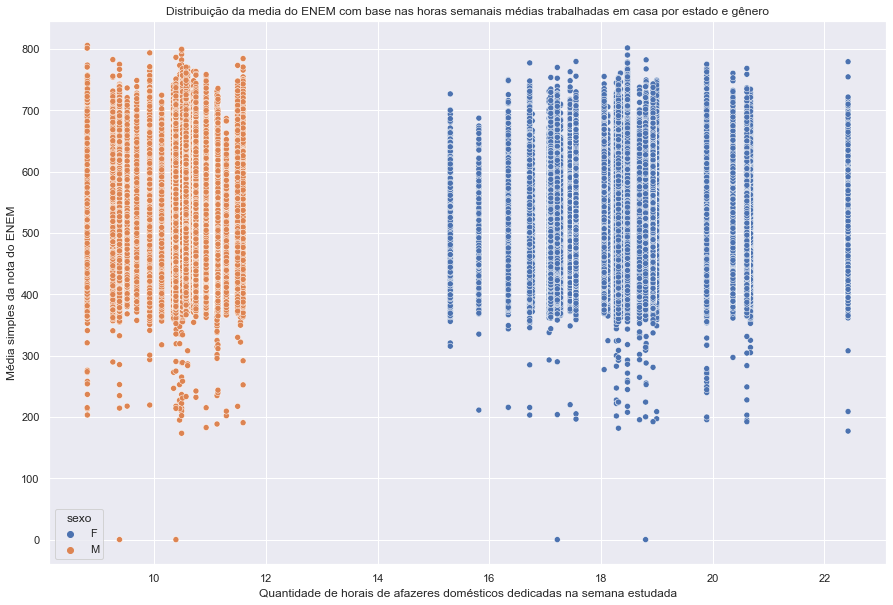

In [41]:
ax = sns.scatterplot(data=relacao_nota_trabalho_domestico, x='horas_semanais_trabalho_domestico', y='media', hue='sexo')

sns.set(rc={'figure.figsize':(15,10)})
ax.set(title ='Distribuição da media do ENEM com base nas horas semanais médias trabalhadas em casa por estado e gênero', 
       xlabel='Quantidade de horas dedicadas a afazeres domésticos na semana estudada', ylabel='Média simples da nota do ENEM') 

###  Minha hipótese era de que as notas mais baixas por parte da média das mulheres em relação aos homens era porque, no Brasil, mulheres dedicam mais horas com afazeres domésticos do que homens. Porém, como foi evidenciado no gráfico acima, a quantidade média de horas por estado não é suficiente para explicar a diferença das notas. Talvez se pudesse ser analisado individualmente a quantidade que cada pessoa levou se dedicando a afazeres doméstiocs ao invés de uma média generalista, o resultado fosse diferente. Porém, não foi o caso, então nada podemos concluir a partir disso

# Correlacionar renda com sucesso


In [69]:
enem_2019_renda_mensal = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019.csv',
                                     sep = ',', usecols = ['renda_mensal_familiar', 'treineiro', 'nota_lc', 'nota_mt', 'nota_ct',
                                                           'nota_ch'],
                                     skiprows = lambda i: i > 0 and random.random() > 0.1)

In [70]:
enem_2019_renda_mensal = enem_2019_renda_mensal.drop(enem_2019_renda_mensal[enem_2019_renda_mensal.treineiro == 1].index)
enem_2019_renda_mensal = enem_2019_renda_mensal.drop(columns = 'treineiro').rename(columns = {'estado': 'sigla_uf'}).dropna()
enem_2019_renda_mensal

,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt
0,7984.00 até 8982.00,557.8,550.1,528.0,418.5
2,998.00 até 1497.00,462.2,499.9,438.0,477.9
3,<= 998.00,422.1,534.4,516.3,585.2
4,Nenhuma Renda,484.7,530.8,591.5,459.1
5,998.00 até 1497.00,624.0,560.3,565.9,664.7
...,...,...,...,...,...
509420,6986.00 até 7984.00,486.2,543.4,560.3,535.2
509421,3992.00 até 4990.00,500.8,563.2,555.3,442.8
509422,1996.00 até 2495.00,514.8,453.7,531.1,491.1
509423,<= 998.00,456.6,419.2,447.2,446.5


In [60]:
enem_2019_renda_mensal.renda_mensal_familiar.unique()

array(['<= 998.00', '3992.00 até 4990.00', '998.00 até 1497.00',
       '7984.00 até 8982.00', 'Nenhuma Renda', '1996.00 até 2495.00',
       '1497.00 até 1996.00', '4990.00 até 5988.00',
       '2495.00 até 2994.00', '8982.00 até 9980.00',
       '2994.00 até 3992.00', '5988.00 até 6986.00', '>= 19960.00',
       '6986.00 até 7984.00', '9980.00 até 11976.00',
       '14970.00 até 19960.00', '11976.00 até 14970.00'], dtype=object)

In [61]:
enem_2019_renda_mensal.renda_mensal_familiar.nunique()

17

In [71]:
enem_2019_renda = enem_2019_renda_mensal.replace({'Nenhuma Renda': 0, '<= 998.00': 1, '998.00 até 1497.00': 2, 
                                                      '1497.00 até 1996.00': 3, '1996.00 até 2495.00': 4,
                                                      '2495.00 até 2994.00': 5, '2994.00 até 3992.00': 6,
                                                      '3992.00 até 4990.00': 7, '4990.00 até 5988.00': 8,
                                                      '5988.00 até 6986.00': 9, '6986.00 até 7984.00': 10,
                                                      '7984.00 até 8982.00': 11, '8982.00 até 9980.00': 12,
                                                      '9980.00 até 11976.00': 13, '11976.00 até 14970.00': 14,
                                                      '14970.00 até 19960.00': 15, '>= 19960.00': 16}
                                                    )
enem_2019_renda
enem_2019_renda.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019_renda.csv',
                           sep=';', index=False, encoding='utf-8-sig')

In [2]:
enem_2019_renda = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019_renda.csv',
                           sep=';', encoding='utf-8-sig')
enem_2019_renda

,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt
0,11,557.8,550.1,528.0,418.5
1,2,462.2,499.9,438.0,477.9
2,1,422.1,534.4,516.3,585.2
3,0,484.7,530.8,591.5,459.1
4,2,624.0,560.3,565.9,664.7
...,...,...,...,...,...
317675,10,486.2,543.4,560.3,535.2
317676,7,500.8,563.2,555.3,442.8
317677,4,514.8,453.7,531.1,491.1
317678,1,456.6,419.2,447.2,446.5


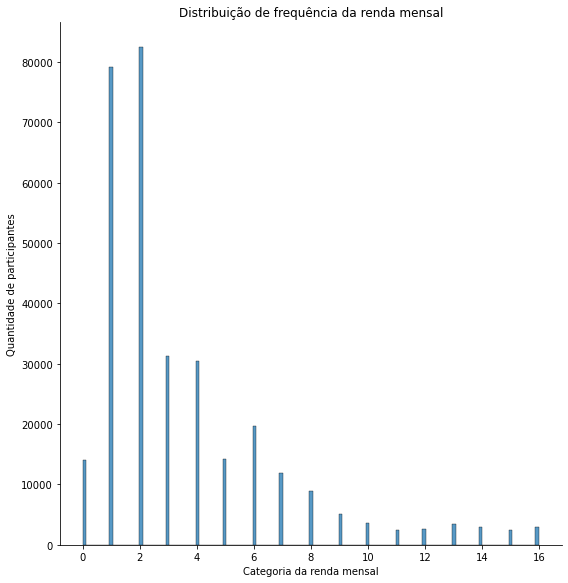

In [21]:
ax = sns.displot(enem_2019_renda['renda_mensal_familiar'], height=8)

ax.set(title ='Distribuição de frequência da renda mensal', 
       xlabel='Categoria da renda mensal', ylabel='Quantidade de participantes') 

In [74]:
enem_2019_renda.corr()

,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt
renda_mensal_familiar,1.000000,0.439815,0.414373,0.402924,0.468615
nota_ct,0.439815,1.000000,0.672637,0.644008,0.650664
nota_ch,0.414373,0.672637,1.000000,0.747750,0.613612
nota_lc,0.402924,0.644008,0.747750,1.000000,0.591320
nota_mt,0.468615,0.650664,0.613612,0.591320,1.000000


### Explicação

# Escola pública vs privada

In [2]:
idep_uf = bd.read_table(dataset_id='br_inep_ideb', table_id='uf', billing_project_id="analytica-desigualdade")
idep_uf.drop(columns = "indicador_rendimento", inplace = True) #é a mesma coisa que a taxa de aprovação!

Downloading: 100%|██████████| 2629/2629 [00:00<00:00, 2799.20rows/s]


In [62]:
idep_2019

,sigla_uf,rede,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
2081,AC,estadual,81.8,265.72,268.17,4.436058,3.7,4.6
2084,AC,privada,96.8,334.38,329.85,6.323886,6.1,6.9
2089,AC,total,82.8,270.17,272.11,4.557830,3.9,4.8
2092,AL,estadual,86.0,255.24,260.64,4.176142,3.6,4.4
2095,AL,privada,95.3,304.00,302.14,5.482231,5.2,5.9
...,...,...,...,...,...,...,...,...
2359,SP,privada,97.7,336.10,323.54,6.253723,6.1,7.0
2364,SP,total,92.3,283.92,286.54,4.966816,4.6,5.2
2367,TO,estadual,87.7,264.14,262.85,4.334516,3.9,4.5
2370,TO,privada,94.9,341.20,321.69,6.297368,6.0,6.7


In [3]:
idep_uf_2019 = idep_uf.query("ano == 2019").drop(columns = 'ano')
idep_2019_total = idep_uf_2019.query("anos_escolares == 'todos (1-4)'").drop(columns = ['anos_escolares', 'ensino'])
idep_2019_total = idep_2019_total.query("rede != 'total'")
idep_2019_total

,sigla_uf,rede,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
2081,AC,estadual,81.8,265.72,268.17,4.436058,3.7,4.6
2084,AC,privada,96.8,334.38,329.85,6.323886,6.1,6.9
2092,AL,estadual,86.0,255.24,260.64,4.176142,3.6,4.4
2095,AL,privada,95.3,304.00,302.14,5.482231,5.2,5.9
2103,AM,estadual,82.3,248.71,255.97,4.014518,3.5,3.8
2106,AM,privada,96.0,308.54,310.70,5.674279,5.5,6.5
2114,AP,estadual,76.7,248.72,256.64,4.024689,3.2,4.3
2117,AP,privada,97.7,301.70,299.51,5.410697,5.3,6.3
2125,BA,estadual,77.5,253.02,256.94,4.089573,3.2,4.3
2128,BA,privada,95.6,328.30,319.76,6.087436,5.9,6.7


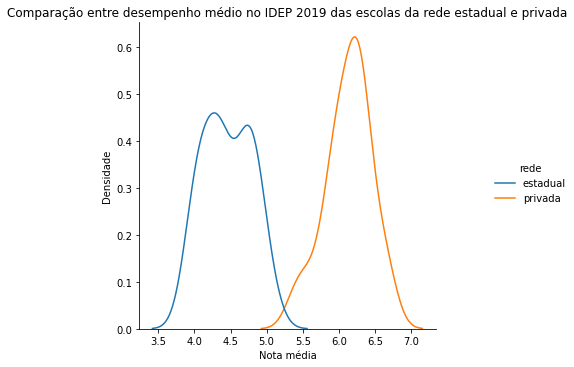

In [11]:
ax = sns.displot(data=idep_2019_total, x='nota_saeb_media_padronizada', hue='rede', kind='kde')
ax.set(title ='Comparação entre desempenho médio no IDEP 2019 das escolas da rede estadual e privada', 
       xlabel='Nota média', ylabel='Densidade') 

# Capital vs Interior

In [5]:
enem_2019 = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019.csv', sep = ',',
                        usecols = ['treineiro', 'nota_lc', 'nota_mt', 'nota_ct', 'nota_ch', 'municipio'],
                        skiprows = lambda i: i > 0 and random.random() > 0.1)
enem_2019

,treineiro,nota_ct,nota_ch,nota_lc,nota_mt,municipio
0,1,443.5,432.4,515.3,397.0,SÃO MIGUEL DO GUAMÁ
1,0,682.0,669.1,640.9,801.9,BELÉM
2,0,343.8,481.0,499.5,397.6,ANANINDEUA
3,0,496.8,475.1,544.9,537.8,SANTA MARIA DO PARÁ
4,0,NaN,NaN,NaN,NaN,BELÉM
...,...,...,...,...,...,...
508287,0,524.0,639.2,591.4,637.5,UBERABA
508288,0,399.4,446.2,521.2,426.0,ENTRE RIOS DE MINAS
508289,0,NaN,NaN,NaN,NaN,CARATINGA
508290,0,523.1,395.3,512.0,464.5,CLARO DOS POÇÕES


In [6]:
enem_2019 = enem_2019.drop(enem_2019[enem_2019.treineiro == 1].index) #removendo os treineiros ;)
enem_2019.drop(columns = 'treineiro', inplace = True)
enem_2019['media'] = (enem_2019.nota_ct + enem_2019.nota_ch + enem_2019.nota_mt + enem_2019.nota_lc)/4
enem_2019.dropna(inplace=True)
enem_2019

,nota_ct,nota_ch,nota_lc,nota_mt,municipio,media
1,682.0,669.1,640.9,801.9,BELÉM,698.475
2,343.8,481.0,499.5,397.6,ANANINDEUA,430.475
3,496.8,475.1,544.9,537.8,SANTA MARIA DO PARÁ,513.650
4,NaN,NaN,NaN,NaN,BELÉM,NaN
5,NaN,NaN,NaN,NaN,ABAETETUBA,NaN
...,...,...,...,...,...,...
508287,524.0,639.2,591.4,637.5,UBERABA,598.025
508288,399.4,446.2,521.2,426.0,ENTRE RIOS DE MINAS,448.200
508289,NaN,NaN,NaN,NaN,CARATINGA,NaN
508290,523.1,395.3,512.0,464.5,CLARO DOS POÇÕES,473.725


In [8]:
capitais = ['JOÃO PESSOA', 'RIO DE JANEIRO', 'NATAL', 'RECIFE', 'TERESINA', 'BELÉM', 'PORTO VELHO', 'MANAUS', 'CUIABÁ', 'PALMAS',
            'SÃO PAULO', 'BRASÍLIA',  'SALVADOR', 'MACAPÁ', 'BOA VISTA', 'RIO BRANCO', 'CAMPO GRANDE', 'VITÓRIA', 'SÃO LUÍS', 
            'MACEIÓ', 'PORTO ALEGRE', 'CURITIBA', 'BELO HORIZONTE', 'FORTALEZA', 'FLORIANÓPOLIS', 'ARACAJU', 'GOIÂNIA']
enem_2019_capitais = enem_2019.query('municipio == @capitais')
enem_2019_interior = enem_2019.query('municipio != @capitais')
enem_2019_capitais.municipio.nunique()

27

In [9]:
print(f"Capitais: \n{enem_2019_capitais.media.describe()}\n\nInterior: \n{enem_2019_interior.media.describe()}")

Capitais: 
count    94320.000000
mean       517.651975
std         75.329621
min          0.000000
25%        459.250000
50%        506.425000
75%        568.675000
max        818.525000
Name: media, dtype: float64

Interior: 
count    222302.000000
mean        502.731343
std          68.488323
min           0.000000
25%         450.275000
50%         492.425000
75%         547.300000
max         795.775000
Name: media, dtype: float64


In [10]:
enem_2019_capitais.media.describe() - enem_2019_interior.media.describe()

count   -127982.000000
mean         14.920633
std           6.841298
min           0.000000
25%           8.975000
50%          14.000000
75%          21.375000
max          22.750000
Name: media, dtype: float64

In [11]:
enem_2019_capitais.municipio.nunique() / (enem_2019.municipio.nunique())*100

0.5191309363583926

In [12]:
enem_2019_capitais.municipio.count() / (enem_2019.municipio.count())*100

29.789465040332004

### Conclusão: Apesar das capitais brasileiras representarem 0.51% das cidades do Brasil, seus candidatos representam 29.64%, uma diferença de 29.13 pontos percentuais, indicando que 
(!!!) Mais pessoas moram nas capitais lol (!!!)

In [69]:
_, p_valor = sp.normaltest(enem_2019.media)
if p_valor > 0.05:
    print("A média se distribui como uma variável normal")
else:
    print("A média não se distribui como uma variável normal")

A média não se distribui como uma variável normal


In [27]:
#H0: não existe diferença na média dos alunos da capital em relação ao interior (media_capital == media_interior)
#H1: a média dos alunos da capital é maior que a média dos alunos do interior   (media_capital != media_interior)
u, p_valor = sp.mannwhitneyu(enem_2019_capitais.media, enem_2019_interior.media, alternative = 'greater')
if p_valor <= 0.05:
    print("A média dos alunos da capital é significativamente maior do que a dos alunos do interior")
else:
    print("Não existe diferença significativa entre esses dois grupos")

A média dos alunos da capital é significativamente maior do que a dos alunos do interior


### Conclusão: Rejeitamos a hipótese de que não existe diferença na média dos alunos da capital em relação ao interior, isto é, concluimos que a média dos alunos da capital é significativamente maior do que a dos alunos do interior. 